In [9]:
import pandas as pd
import os

In [10]:
#bandit_file="/Users/ruthjohnson/Desktop/CS230/bandit parser/test_bandit.txt"
#benchmark_name=os.path.basename(bandit_file).split('_bandit.txt')[0]
#benchmark_name
# df = pd.read_csv(bandit_file, sep=',')
# total_security_issues = len(df.index)
# total_security_issues

In [3]:
#dataframe_file="/Users/ruthjohnson/Desktop/CS230/stat_analysis/test_dataframe.txt"
dataframe_file = "/Users/nandini/Desktop/CS230/CS230/stat_analysis/combined_df.txt"
df = pd.read_csv(dataframe_file)

df.head()

,Unnamed: 0,I,R,C,W,E,F,TOTAL_PYLINT,B101,B102,...,B609,B610,B611,B701,B702,B703,HIGH_SEVERITY,LOW_SEVERITY,MED_SEVERITY,TOTAL_BANDIT
0,alt-model-checkpoint-1.0.0,0,1,14,2,6,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
1,bigchaindb_driver-0.5.1,0,35,141,41,63,0,280,120,0,...,0,0,0,0,0,0,0,120,0,120
2,birdhousebuilder.recipe.nginx-0.1.4,0,2,64,6,7,0,79,0,0,...,0,0,0,0,4,0,0,0,6,6
3,bise.theme-1.20.1,0,29,155,44,86,0,314,0,0,...,0,0,0,0,0,0,0,1,4,5
4,bbcode-1.0.8,0,11,33,19,0,0,63,0,0,...,0,0,0,0,0,0,0,0,0,0


# Overall correlation between security and errors

In [11]:
import scipy.stats as st
import statsmodels.formula.api as smf

print(df.columns)
model = smf.ols('TOTAL_BANDIT ~ TOTAL_PYLINT', data=df).fit()
summary = model.summary()
print(summary)


Index(['Unnamed: 0', 'I', 'R', 'C', 'W', 'E', 'F', 'TOTAL_PYLINT', 'B101',
       'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B110',
       'B111', 'B112', 'B201', 'B301', 'B302', 'B303', 'B304', 'B305', 'B306',
       'B307', 'B308', 'B309', 'B310', 'B311', 'B312', 'B313', 'B314', 'B315',
       'B316', 'B317', 'B318', 'B319', 'B320', 'B321', 'B322', 'B323', 'B324',
       'B325', 'B401', 'B402', 'B403', 'B404', 'B405', 'B406', 'B407', 'B408',
       'B409', 'B410', 'B411', 'B412', 'B413', 'B501', 'B502', 'B503', 'B504',
       'B505', 'B506', 'B507', 'B601', 'B602', 'B603', 'B604', 'B605', 'B606',
       'B607', 'B608', 'B609', 'B610', 'B611', 'B701', 'B702', 'B703',
       'HIGH_SEVERITY', 'LOW_SEVERITY', 'MED_SEVERITY', 'TOTAL_BANDIT'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           TOTAL_BANDIT   R-squared:                       0.049
Model:                            OLS   Adj. R-s

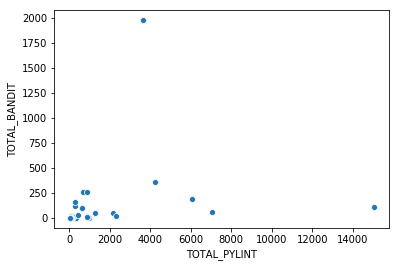

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.scatterplot(x='TOTAL_PYLINT', y='TOTAL_BANDIT', data=df)

# plot slope too 

plt.show()

In [13]:
model = smf.ols('HIGH_SEVERITY ~ I + R + C + W + E + F', data=df).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          HIGH_SEVERITY   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.53e-06
Time:                        19:01:53   Log-Likelihood:                -69.686
No. Observations:                  35   AIC:                             149.4
Df Residuals:                      30   BIC:                             157.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3935      0.375      1.049      0.3